In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [71]:
air_data=pd.read_excel("AirQualityUCI.xlsx")

In [72]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [73]:
air_data.shape

(9357, 15)

In [74]:
air_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [75]:
air_data.duplicated().sum()

0

In [76]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [77]:
air_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,9357,2004-09-21 04:30:05.193972480,2004-03-10 00:00:00,2004-06-16 00:00:00,2004-09-21 00:00:00,2004-12-28 00:00:00,2005-04-04 00:00:00,NaN
CO(GT),9357.0,-34.207524,-200.0,0.6,1.5,2.6,11.9,77.65717
PT08.S1(CO),9357.0,1048.869652,-200.0,921.0,1052.5,1221.25,2039.75,329.817015
NMHC(GT),9357.0,-159.090093,-200.0,-200.0,-200.0,-200.0,1189.0,139.789093
C6H6(GT),9357.0,1.865576,-200.0,4.004958,7.886653,13.636091,63.741476,41.380154
PT08.S2(NMHC),9357.0,894.475963,-200.0,711.0,894.5,1104.75,2214.0,342.315902
NOx(GT),9357.0,168.6042,-200.0,50.0,141.0,284.2,1479.0,257.424561
PT08.S3(NOx),9357.0,794.872333,-200.0,637.0,794.25,960.25,2682.75,321.977031
NO2(GT),9357.0,58.135898,-200.0,53.0,96.0,133.0,339.7,126.931428
PT08.S4(NO2),9357.0,1391.363266,-200.0,1184.75,1445.5,1662.0,2775.0,467.192382


In [78]:
if "Date" in air_data.columns and "Time" in air_data.columns:
    air_data["DateTime"]=pd.to_datetime(air_data["Date"].astype(str)+" "+air_data["Time"].astype(str),errors="coerce")
    air_data.drop(columns=["Date","Time"],inplace=True)

In [79]:
air_data_num=air_data.select_dtypes(include=np.number)

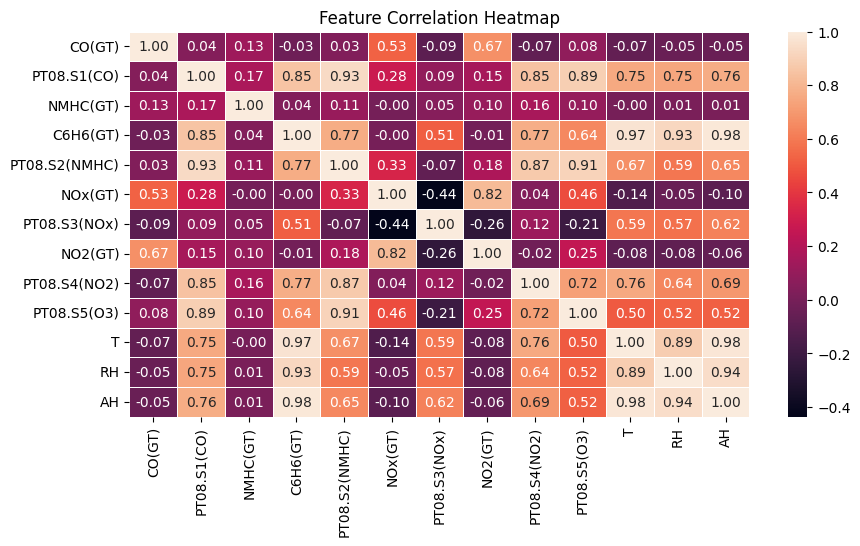

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(air_data_num.corr(),annot=True,fmt=".2f",linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

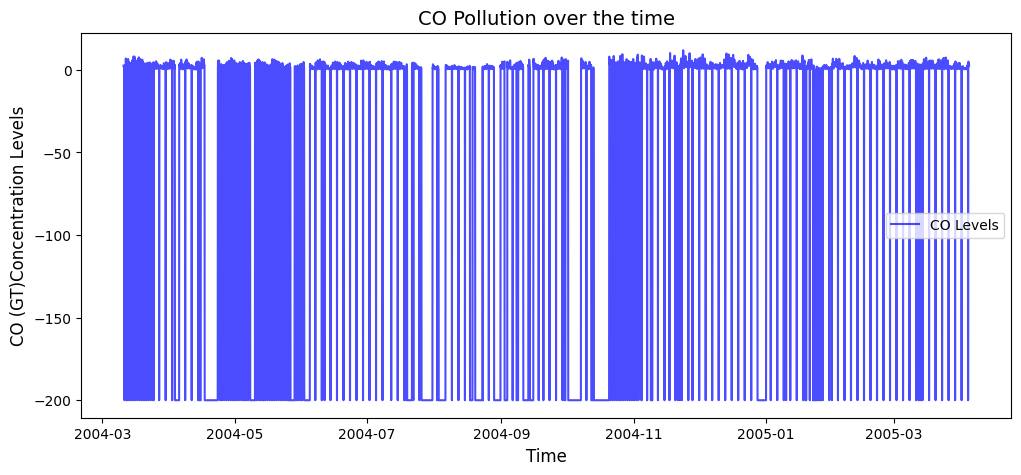

In [81]:
if"DateTime" in air_data.columns and "CO(GT)" in air_data.columns:
    plt.figure(figsize=(12,5))
    plt.plot(air_data["DateTime"],air_data["CO(GT)"],label="CO Levels",color="b",alpha=0.7)
    plt.xlabel("Time",fontsize=12)
    plt.ylabel("CO (GT)Concentration Levels",fontsize=12)
    plt.title("CO Pollution over the time",fontsize=14)
    plt.legend()
    plt.show()


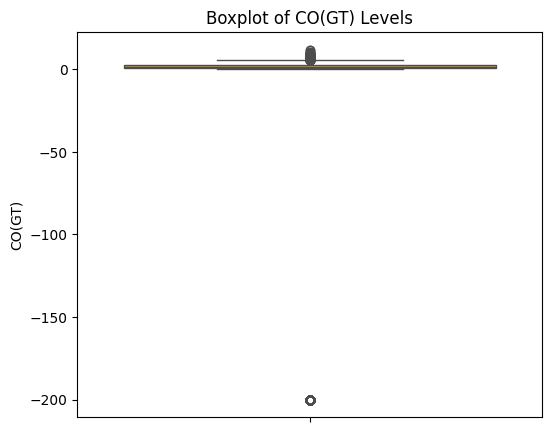

In [82]:
if "CO(GT)" in air_data.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(y=air_data["CO(GT)"], color="orange")
    plt.title("Boxplot of CO(GT) Levels")
    plt.show()

In [83]:
X=air_data_num.drop(columns="CO(GT)")
y=air_data_num["CO(GT)"]

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [86]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [88]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MSE": mse,"MAE":mae, "R2 Score": r2}
    print(name)
    print(mse)
    print(mae)
    print(r2)

Linear Regression
2863.3927002483315
33.472030967729204
0.5153462866581083
Decision Tree
3948.9925401491364
20.08512362637363
0.3315992255003224
Random Forest
2079.129646381321
22.32119480588517
0.6480895185803432


In [89]:
labels = list(results.keys())
mse_values = [results[model]['MSE'] for model in labels]
mae_values = [results[model]['MAE'] for model in labels]
r2_values = [results[model]['R2 Score'] for model in labels]

In [90]:
x = np.arange(len(labels))
width = 0.35

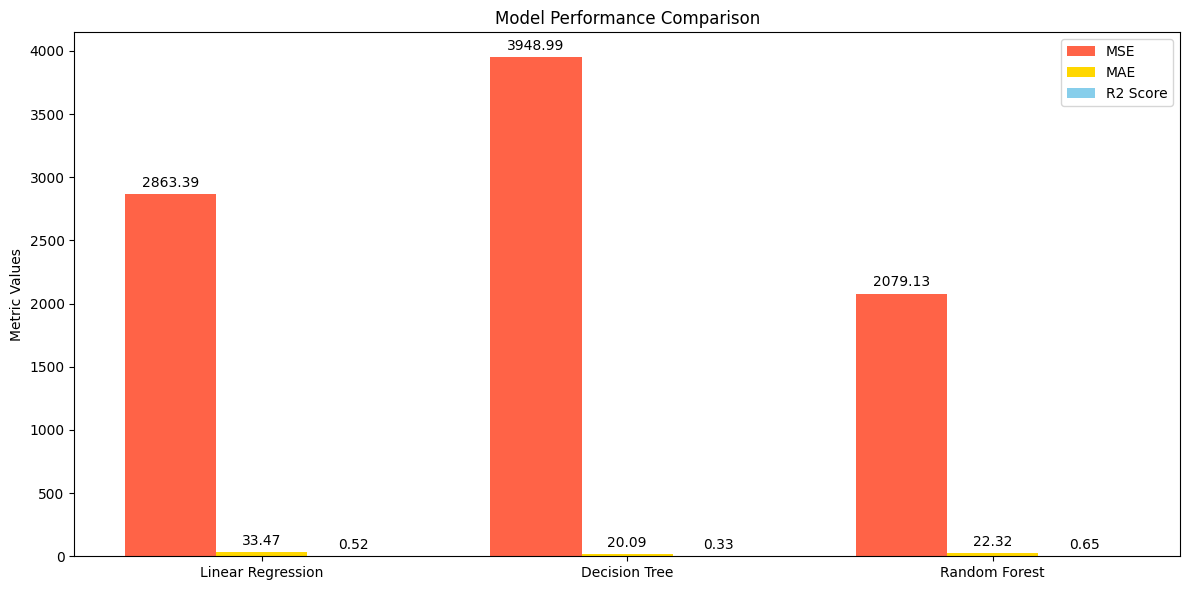

In [100]:
labels = list(results.keys())
mse_values = [results[model]['MSE'] for model in labels]
mae_values = [results[model]['MAE'] for model in labels]
r2_values = [results[model]['R2 Score'] for model in labels]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots
bar1 = ax.bar(x - width, mse_values, width, label='MSE', color='tomato')
bar2 = ax.bar(x, mae_values, width, label='MAE', color='gold')
bar3 = ax.bar(x + width, r2_values, width, label='R2 Score', color='skyblue')

# Labels
ax.set_ylabel('Metric Values')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()
